# 텍스트 데이터 분석

In [ ]:
!pip install wordcloud

In [101]:
import pandas as pd
import numpy as np
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords

import itertools
from collections import Counter

from wordcloud import WordCloud

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rc('font', family='Malgun Gothic')

## WordCloud
데이터의 태그들을 분석하여 중요도나 인기도 등을 고려하여 시각적으로 표시하는 것 <br>
주로 단어의 빈도를 이용하며, 중요도에 따라 글자의 색상이나 굵기 등 형태를 변화시킬 수 있음
<br>

```python
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

counter = Counter(word_list)

word_cloud = WordCloud(
    background_color="black", 
    max_font_size=60,
    colormap='prism'
    ).generate_from_frequencies(counter)

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.axis('off')
```
<br>

아래의 방법을 통해 특정 이미지 모양으로 시각화 가능
```python
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image

mask = Image.new('RGBA', (2048, 2048), (255, 255, 255))
image = Image.open('./data/heart.png').convert('RGBA')
x, y = image.size
mask.paste(image, (0, 0, x, y), image)
mask = np.array(mask)

counter = Counter(word_list)

word_cloud = WordCloud(
    background_color="black", 
    max_font_size=60,
    colormap='prism',
    mask=mask,
    ).generate_from_frequencies(counter)

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.axis('off')
```

In [125]:
# Kiwi 객체를 생성
kiwi = Kiwi()

# 'kiwi_tokenizer' 함수 정의
# 'contents'는 입력 텍스트, 'stopwords'는 불용어 목록 (optional)
def kiwi_tokenizer(contents, stopwords=None):
    
    # 'contents'를 Kiwi 객체로 토크나이즈(단어 분리)하고, 명사(NNP, NNG)만 추출
    tokens = [
        token.form  # 각 토큰의 형태소를 반환 (단어 자체)
        for token
        in kiwi.tokenize(contents, stopwords=stopwords)  # Kiwi 객체를 사용해 토크나이즈 실행
        if token.tag in {'NNP', 'NNG'}  # 추출된 토큰이 고유명사(NNP) 또는 일반명사(NNG)인 경우만 필터링
    ]

    # 최종적으로 명사들로 구성된 리스트를 반환
    return tokens

In [4]:
comments = pd.read_csv('./data/comments.csv').query('video_id=="JPaubSOSxeM"')

In [9]:
comments['tokens'] = comments.comments.apply(lambda x: kiwi_tokenizer(x))

In [10]:
# 빈 딕셔너리 vocabs를 생성하여 단어와 그 빈도를 저장
vocabs = {}

# comments 데이터프레임의 tokens 열을 리스트로 변환하고, 모든 토큰을 하나의 튜플로 결합
words = tuple(itertools.chain(*comments.tokens.tolist()))

# 각 단어의 빈도를 계산
for word in words:
    # 단어가 이미 vocabs에 존재하는 경우 빈도를 1 증가
    if word in vocabs:
        vocabs[word] += 1
    # 단어가 vocabs에 없는 경우 새로 추가하고 빈도를 1로 설정
    else:
        vocabs[word] = 1

# 최종적으로 단어와 빈도를 저장한 딕셔너리 vocabs를 반환
vocabs

{'숨': 113,
 '아빠': 196,
 '세뇌': 2,
 '여자': 24,
 '남자': 34,
 '외박': 37,
 '사랑': 13,
 '애비': 3,
 '아영': 62,
 '짧대': 5,
 '아버지': 81,
 '귀여워': 1,
 '이번': 101,
 '레전드': 48,
 '좀비': 2,
 '소리': 16,
 '수정': 90,
 '대역': 2,
 '대박': 21,
 '이야기': 9,
 '기업': 2,
 '딸아이': 4,
 '캐나다': 2,
 '의심': 15,
 '엄마': 62,
 '마누라': 4,
 '장모': 1,
 '장인': 1,
 '구라': 13,
 '일': 22,
 '상기': 1,
 '딸': 154,
 '관광': 7,
 '진전': 1,
 '유투브': 5,
 '확인': 6,
 '사위': 1,
 '사이': 8,
 '손주': 2,
 '지금': 13,
 '사실': 2,
 '타임': 1,
 '결국': 5,
 '할아버지': 3,
 '장려': 1,
 '아버님': 56,
 '선': 6,
 '대본': 29,
 '야채': 66,
 '누나': 10,
 '뷰티 인사이드': 3,
 '죈장': 1,
 '눈물': 8,
 '돈': 8,
 '나이': 21,
 '세상': 20,
 '평생': 6,
 '양육': 1,
 '여행': 12,
 '시집': 9,
 '신데렐라': 1,
 '놀이': 1,
 '때': 122,
 '먹버': 1,
 '남친': 29,
 '호흡': 7,
 '아내': 6,
 '짓': 4,
 '딸래미': 4,
 '펜션': 10,
 '말': 38,
 '스릴러': 19,
 '본인': 2,
 '자연': 7,
 '사람': 37,
 '아귀': 1,
 '연기': 99,
 '나라': 3,
 '평균': 1,
 '외모': 6,
 '고봉': 1,
 '중간': 10,
 '몰입': 33,
 '급발진': 10,
 '모습': 7,
 '인간': 3,
 '골프채': 2,
 '낙': 4,
 '시대': 6,
 '낚시': 79,
 '생각': 34,
 '반추': 1,
 '물': 8,
 '뒤': 56,
 '지리'

In [21]:
# vocabs의 키(단어)를 그 빈도에 따라 내림차순으로 정렬
# 각 단어를 정렬된 순서에 맞춰 빈도를 매핑하여 새로운 딕셔너리를 생성
dict(zip(
    sorted(vocabs, key=lambda x: vocabs[x], reverse=True),  # vocabs의 키를 빈도에 따라 내림차순 정렬
    sorted(vocabs.values(), reverse=True)  # vocabs의 값을 내림차순 정렬
))

{'축하': 267,
 '영상': 253,
 '아빠': 196,
 '딸': 154,
 '이세돌': 145,
 '때': 122,
 '개': 115,
 '숨': 113,
 '수': 113,
 '알파고': 109,
 '이번': 101,
 '연기': 99,
 '수정': 90,
 '신': 82,
 '아버지': 81,
 '낚시': 79,
 '구독자': 72,
 '최고': 67,
 '야채': 66,
 '아영': 62,
 '엄마': 62,
 '마지막': 61,
 '바둑': 60,
 '아버님': 56,
 '뒤': 56,
 '퀄리티': 56,
 '부모': 54,
 '디테일': 52,
 '친구': 49,
 '너덜트': 49,
 '잼': 49,
 '진짜': 49,
 '국': 49,
 '레전드': 48,
 '급': 47,
 '반전': 45,
 '전': 44,
 '부녀': 44,
 '신뢰': 42,
 '역대': 40,
 '말': 38,
 '채널': 38,
 '박': 38,
 '외박': 37,
 '사람': 37,
 '대': 36,
 '구독': 35,
 '창': 35,
 '남자': 34,
 '생각': 34,
 '시간': 34,
 '몰입': 33,
 '수정이': 33,
 '감사': 33,
 '전화': 33,
 '공감': 33,
 '집': 32,
 '소파': 30,
 '배우': 30,
 '영화': 30,
 '대본': 29,
 '남친': 29,
 '통화': 29,
 '티키타카': 27,
 '대국': 27,
 '정도': 26,
 '숏': 26,
 '오늘': 26,
 '방패': 25,
 '역': 25,
 '앞': 25,
 '중요': 25,
 '여자': 24,
 '박스': 24,
 '대사': 23,
 '지간': 23,
 '딜': 23,
 '일': 22,
 '이름': 22,
 '자식': 22,
 '결혼': 22,
 '낚싯대': 22,
 '어머니': 22,
 '대박': 21,
 '나이': 21,
 '기대': 21,
 '현실': 21,
 '세상': 20,
 '댓글': 20,
 '기보': 20,
 '스릴러

In [42]:
# 'words'를 numpy 배열로 변환
words = np.array(words)

# 특정 단어를 다른 단어로 치환
# '아버지' 또는 '아버님'을 '아빠'로 변경
words = np.where((words == '아버지') | (words == '아버님'), '아빠', words)

# '수정'을 '수정이'로 변경
words = np.where(words == '수정', '수정이', words)

In [43]:
counter = Counter(words)

In [44]:
# 한 글자 불용어 제거
counter.pop('때')
counter.pop('수')
counter.pop('신')
counter.pop('뒤')
counter.pop('개')

115

In [45]:
# 2글자 이상 불용어 제거
counter.pop('축하')
counter.pop('영상')
counter.pop('이번')

101

(-0.5, 399.5, 199.5, -0.5)

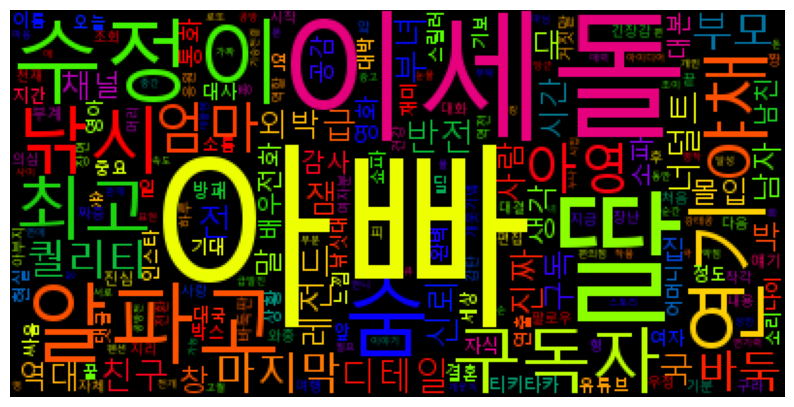

In [46]:
# WordCloud 객체 생성
word_cloud = WordCloud(
    font_path='malgun',  # 한글 폰트 설정 (Malgun Gothic 사용)
    background_color='black',  # 배경색을 검정색으로 설정
    max_font_size=100,  # 최대 글자 크기를 100으로 설정
    colormap='prism',  # 색상 맵을 'prism'으로 설정
).generate_from_frequencies(counter)  # 단어 빈도 수(counter)를 기반으로 단어 구름 생성

# 그래프의 크기를 설정
plt.figure(figsize=(10, 8))

# 생성된 단어 구름 이미지를 표시
plt.imshow(word_cloud)

# 축을 표시하지 않도록 설정
plt.axis('off')

# Pracice

## 곽튜브
https://www.youtube.com/watch?v=1IlOwJtyE7Q&ab_channel=%EA%B3%BD%ED%8A%9C%EB%B8%8C

In [67]:
data = pd.read_pickle('./data/comments_kwak.pickle')

In [68]:
kiwi = Kiwi()
kiwi.add_user_word('곽튜브', 'NNP')
kiwi.add_user_word('학폭', 'NNG')
kiwi.add_user_word('빠니보틀', 'NNG')

data['tokens'] = data.textOriginal.apply(lambda x: kiwi_tokenizer(x))
counter = Counter(list(itertools.chain(*data.tokens)))

(-0.5, 399.5, 199.5, -0.5)

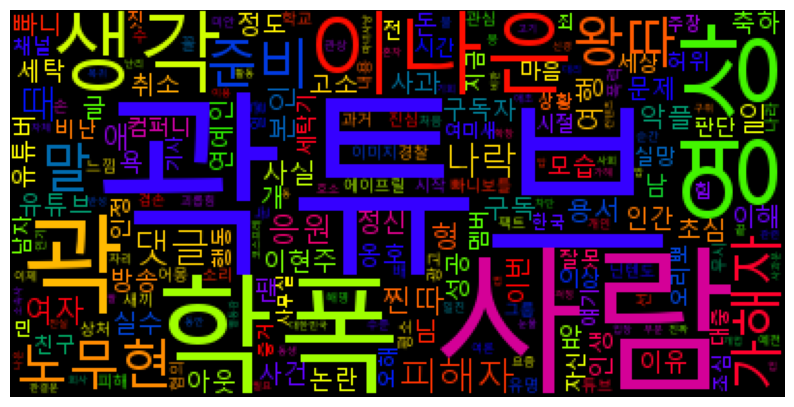

In [69]:
word_cloud = WordCloud(
    font_path='malgun',
    background_color='black',
    max_font_size=100,
    colormap='prism',
).generate_from_frequencies(counter)

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.axis('off')

## 오킹

https://www.youtube.com/watch?v=oakQvwCbvr8&ab_channel=%EC%98%A4%ED%82%B9TV

In [78]:
data = pd.read_pickle('./data/comments_oking.pickle')

In [117]:
kiwi = Kiwi()
kiwi.add_user_word('오킹', 'NNP')
kiwi.add_user_word('오퀸', 'NNP')
kiwi.add_user_word('복귀각', 'NNG')

True

In [134]:
stopwords = Stopwords()
stopwords.add(('오', 'NNG'))
stopwords.add(('킹', 'NNG'))
stopwords.add(('오', 'NNP'))
stopwords.add(('킹', 'NNP'))
stopwords.add(('애', 'NNG'))
stopwords.add(('영상', 'NNG'))

In [135]:
data['tokens'] = data.textOriginal.apply(lambda x: kiwi_tokenizer(x, stopwords))
words = list(itertools.chain(*data.tokens))
counter = Counter(itertools.chain(*data.tokens))

In [129]:
# 불용어 제거
# counter.pop('오')
# counter.pop('킹')
# counter.pop('애')
# counter.pop('영상')

1122

(-0.5, 399.5, 199.5, -0.5)

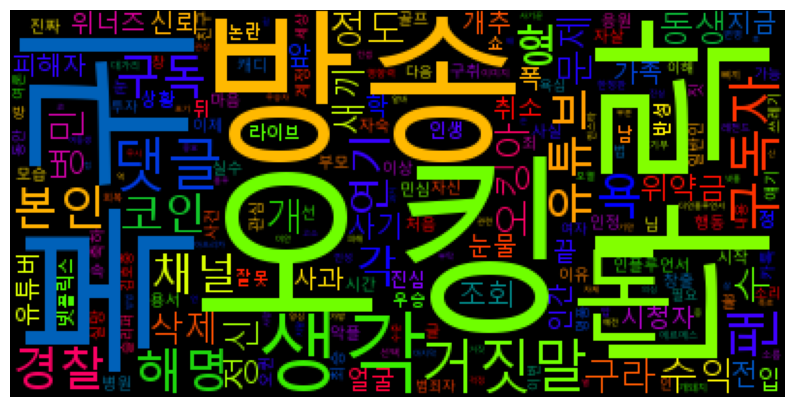

In [137]:
word_cloud = WordCloud(
    font_path='malgun',
    background_color='black',
    max_font_size=100,
    colormap='prism',
).generate_from_frequencies(counter)

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.axis('off')

## 특정 이미지에 wordcloud 생성

In [145]:
# 이미지 파일을 열어 Image 객체를 생성
heart = Image.open('./images/heart.jpg')

# 열린 이미지를 numpy 배열로 변환
mask = np.array(heart)

(-0.5, 1279.5, 679.5, -0.5)

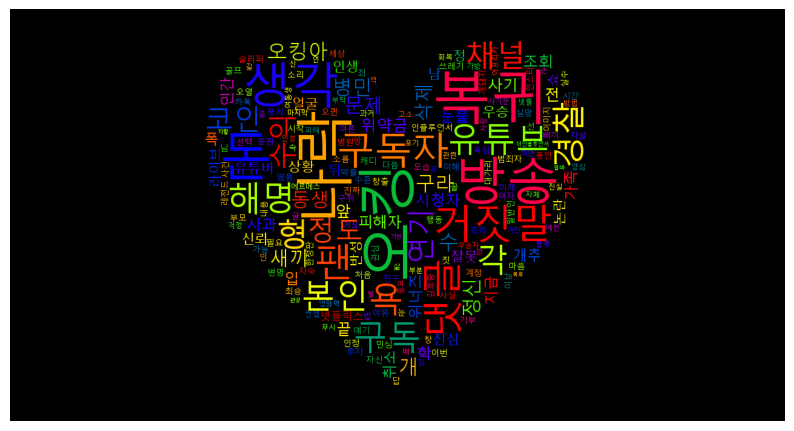

In [146]:
# WordCloud 객체 생성
word_cloud = WordCloud(
    font_path='malgun',  # 한글 폰트 설정 (Malgun Gothic 사용)
    background_color='black',  # 배경색을 검정색으로 설정
    max_font_size=100,  # 최대 글자 크기를 100으로 설정
    colormap='prism',  # 색상 맵을 'prism'으로 설정
    mask=mask,  # 단어 구름의 모양을 지정할 마스크 이미지
).generate_from_frequencies(counter)  # 단어 빈도 수(counter)를 기반으로 단어 구름 생성

# 그래프의 크기를 설정
plt.figure(figsize=(10, 8))

# 생성된 단어 구름 이미지를 표시
plt.imshow(word_cloud)

# 축을 표시하지 않도록 설정
plt.axis('off')